In [2]:
import pandas as pd 
import numpy as np 

def convert(val):
    val = str(val)
    if "k" in val:
        val = val.replace("k","")
        val = float(val)*1_000
    elif "M" in val:
        val = val.replace("M","")
        val = float(val)*1_000_000
    elif "B" in val:
        val = val.replace("B","")
        val = float(val)*1_000_000_000
    elif "TR" in val:
        val = val.replace("TR","")
        val = float(val)*1e12
    else:
        val = float(val)
    return val

# Import data 
gdp_percap = pd.read_csv("gdppercapita_us_inflation_adjusted.csv")
total_gdp = pd.read_csv("total_gdp_us_inflation_adjusted.csv")
gini = pd.read_csv("gini.csv")

# Set index to country 
gdp_percap = gdp_percap.set_index('country')
total_gdp = total_gdp.set_index('country')
gini = gini.set_index('country')

# Convert any string to a number - data prep - DONE 
gdp_percap_copy = gdp_percap.map(lambda x:convert(x),na_action = 'ignore')
total_gdp_copy = total_gdp.map(lambda x:convert(x),na_action = 'ignore')


# Merge the data together into hierarchical index - concat - DONE 
# Only outer to ensure data shares values 
# Make sure we have common countries to start 

combined_data = pd.concat([total_gdp_copy, gdp_percap_copy, gini], axis=0,join='inner', keys=['Total GDP', 'GDP Per Capita', 'Gini Coeff'])
combined_data.index.names = ['Metric', 'Country']





common_countries = list(set(gini.index.values) & set(total_gdp_copy.index.values) & set(gdp_percap_copy.index.values))
combined_data_fixed = combined_data[combined_data.index.isin(common_countries,level='Country')]

#gini[~gini.index.isin(gdp_percap.index) ].index
#gdp_percap[~gdp_percap.index.isin(gini.index) ].index

rows, columns = combined_data.shape
print(f'rows: {rows} cols: {columns}')





rows: 621 cols: 64


In [3]:
# Check for any country with more than X NANs 
#Canada = combined_data.xs('Canada', level='Country')
#Canada_GDP_2023 = combined_data.xs('Total GDP', level='Metric').loc['Canada', '2023']
#combined_data.isnull().sum()
idx = pd.IndexSlice
combined_data.loc[idx[:,('USA','UK','Brazil','China','Poland','Ukraine','Ireland')],idx[:]]
#combined_data_fixed.loc[idx[:,'Taiwan'],idx[:]]
#print(*combined_data_fixed.groupby('Country'))

# Drop or handle 
# Plot every country per year?? 
# Plot continent blocks?? 
# Look for any outliers 
# Explain those 
# Plot average, median, etc. global GDP per year?? 

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Metric,Country,,,,,,,,,,,,,,,,,,,,,
Total GDP,USA,3.430000e+12,3.510000e+12,3.720000e+12,3.890000e+12,4.110000e+12,4.380000e+12,4.660000e+12,4.780000e+12,5.010000e+12,5.160000e+12,...,1.780000e+13,1.830000e+13,1.860000e+13,1.910000e+13,1.970000e+13,2.020000e+13,1.970000e+13,2.090000e+13,2.140000e+13,2.210000e+13
GDP Per Capita,USA,1.900000e+04,1.910000e+04,2.000000e+04,2.050000e+04,2.140000e+04,2.250000e+04,2.370000e+04,2.400000e+04,2.490000e+04,2.550000e+04,...,5.580000e+04,5.700000e+04,5.770000e+04,5.870000e+04,6.010000e+04,6.140000e+04,5.950000e+04,6.300000e+04,6.430000e+04,6.590000e+04
Gini Coeff,USA,3.670000e+01,3.750000e+01,3.650000e+01,3.630000e+01,3.630000e+01,3.620000e+01,3.580000e+01,3.610000e+01,3.500000e+01,3.520000e+01,...,4.150000e+01,4.120000e+01,4.110000e+01,4.120000e+01,4.140000e+01,4.140000e+01,4.260000e+01,4.400000e+01,4.510000e+01,4.590000e+01
Total GDP,UK,7.930000e+11,8.150000e+11,8.240000e+11,8.640000e+11,9.120000e+11,9.310000e+11,9.460000e+11,9.720000e+11,1.030000e+12,1.050000e+12,...,2.860000e+12,2.930000e+12,2.980000e+12,3.060000e+12,3.110000e+12,3.160000e+12,2.830000e+12,3.070000e+12,3.220000e+12,3.230000e+12
GDP Per Capita,UK,1.510000e+04,1.540000e+04,1.550000e+04,1.610000e+04,1.690000e+04,1.710000e+04,1.730000e+04,1.770000e+04,1.860000e+04,1.890000e+04,...,4.430000e+04,4.500000e+04,4.550000e+04,4.640000e+04,4.670000e+04,4.720000e+04,4.220000e+04,4.590000e+04,4.760000e+04,4.730000e+04
Gini Coeff,UK,3.270000e+01,3.280000e+01,3.170000e+01,3.420000e+01,3.370000e+01,3.240000e+01,3.370000e+01,3.270000e+01,3.260000e+01,3.370000e+01,...,3.400000e+01,3.320000e+01,3.480000e+01,3.510000e+01,3.600000e+01,3.600000e+01,3.680000e+01,3.770000e+01,3.840000e+01,3.900000e+01
Total GDP,Brazil,1.880000e+11,2.050000e+11,2.180000e+11,2.190000e+11,2.270000e+11,2.320000e+11,2.480000e+11,2.580000e+11,2.840000e+11,3.110000e+11,...,1.870000e+12,1.800000e+12,1.740000e+12,1.770000e+12,1.800000e+12,1.820000e+12,1.760000e+12,1.840000e+12,1.900000e+12,1.950000e+12
GDP Per Capita,Brazil,2.600000e+03,2.740000e+03,2.840000e+03,2.770000e+03,2.790000e+03,2.770000e+03,2.880000e+03,2.920000e+03,3.130000e+03,3.340000e+03,...,9.340000e+03,8.940000e+03,8.580000e+03,8.630000e+03,8.720000e+03,8.770000e+03,8.440000e+03,8.800000e+03,9.030000e+03,9.260000e+03
Gini Coeff,Brazil,5.530000e+01,5.570000e+01,5.610000e+01,5.650000e+01,5.680000e+01,5.710000e+01,5.730000e+01,5.750000e+01,5.760000e+01,5.780000e+01,...,5.210000e+01,5.190000e+01,5.330000e+01,5.330000e+01,5.390000e+01,5.340000e+01,5.460000e+01,5.610000e+01,5.710000e+01,5.800000e+01


In [4]:


combined_data_fixed.groupby('Metric').describe().stack().iloc[:,[0,-1]]
#For the rows you can try the following 
#combined_data_fixed.groupby('Metric').describe().stack().iloc[:,[0,-1]].loc[('Gini Coeff','mean')]
combined_data_fixed.groupby('Metric')[['1960','2023']].describe().stack()


C:\Users\ctcas\AppData\Local\Temp\ipykernel_16512\698487829.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  combined_data_fixed.groupby('Metric').describe().stack().iloc[:,[0,-1]]
C:\Users\ctcas\AppData\Local\Temp\ipykernel_16512\698487829.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  combined_data_fixed.groupby('Metric')[['1960','2023']].describe().stack()


1960          2023
Metric                                          
GDP Per Capita count  1.040000e+02  1.850000e+02
               mean   4.918654e+03  1.562752e+04
               std    6.825181e+03  2.485401e+04
               min    2.350000e-03  2.540000e+02
               25%    8.285000e+02  2.090000e+03
               50%    1.885000e+03  6.240000e+03
               75%    6.307500e+03  1.830000e+04
               max    3.990000e+04  2.250000e+05
Gini Coeff     count  1.930000e+02  1.930000e+02
               mean   4.125130e+01  4.004093e+01
               std    1.013730e+01  7.887050e+00
               min    1.900000e+01  2.610000e+01
               25%    3.510000e+01  3.480000e+01
               50%    4.050000e+01  3.820000e+01
               75%    4.660000e+01  4.470000e+01
               max    7.350000e+01  6.620000e+01
Total GDP      count  1.040000e+02  1.840000e+02
               mean   9.700888e+10  5.001760e+11
               std    3.626224e+11  2.135426e+12
               min    1.250000e+03  4.690000e+07
               25%    2.472500e+09  1.170000e+10
               50%    7.660000e+09  4.280000e+10
               75%    4.965000e+10  2.360000e+11
               max    3.430000e+12  2.210000e+13

In [5]:
#combined_data_fixed.loc['Gini Coeff'].aggregate(['min','max','mean']).transpose()
df = combined_data_fixed.transpose().loc[idx[:],idx[:,'USA']]['Total GDP']

#df.groupby(df[df['GDP Per Capita']>100000])
#print(df[df.loc['GDP Per Capita']>100000])

#df[df.loc['GDP Per Capita']>100000].index
powers = pd.cut(df.unstack(), [0, 1e11, 1e14, 1e17])
powers
# lvl = pd.cut(df.loc['2022','Gini Coeff'], [0, 20, 50, 100])
#df.pivot_table('Gini Coeff', powers)

Country      
USA      1960    (100000000000.0, 100000000000000.0]
         1961    (100000000000.0, 100000000000000.0]
         1962    (100000000000.0, 100000000000000.0]
         1963    (100000000000.0, 100000000000000.0]
         1964    (100000000000.0, 100000000000000.0]
                                ...                 
         2019    (100000000000.0, 100000000000000.0]
         2020    (100000000000.0, 100000000000000.0]
         2021    (100000000000.0, 100000000000000.0]
         2022    (100000000000.0, 100000000000000.0]
         2023    (100000000000.0, 100000000000000.0]
Length: 64, dtype: category
Categories (3, interval[float64, right]): [(0.0, 100000000000.0] < (100000000000.0, 100000000000000.0] < (100000000000000.0, 1e+17]]

['Bolivia', 'Kyrgyz Republic', 'Lesotho', 'Palau', 'Australia', 'Nepal', 'Algeria', 'Latvia', 'Vanuatu', 'Mexico', 'Sierra Leone', 'Sweden', 'South Korea', 'Seychelles', 'Sao Tome and Principe', 'Lebanon', 'Tonga', 'Mauritania', 'Rwanda', 'Papua New Guinea', 'Turkey', 'Cambodia', 'Malaysia', 'Dominica', 'Angola', 'Hong Kong, China', 'Lao', 'USA', 'North Macedonia', 'Vietnam', 'Gambia', 'Benin', 'Italy', 'Nicaragua', 'Slovenia', 'Somalia', 'Paraguay', 'Finland', 'Malawi', 'Netherlands', 'Afghanistan', 'Andorra', 'New Zealand', 'Burkina Faso', 'Switzerland', 'Nigeria', 'Ecuador', 'Senegal', 'Iran', 'Qatar', 'Estonia', 'Suriname', 'Uzbekistan', 'Malta', 'Romania', 'Montenegro', 'Kenya', 'Bulgaria', 'Moldova', 'Ireland', 'Samoa', 'Congo, Dem. Rep.', 'Thailand', 'Equatorial Guinea', 'Eswatini', 'Jamaica', 'Costa Rica', 'Sri Lanka', 'Micronesia, Fed. Sts.', 'Guinea-Bissau', 'Haiti', 'Tuvalu', 'Austria', 'Belarus', 'Georgia', 'Kuwait', 'St. Lucia', 'Cuba', 'Namibia', 'Nauru', 'Tajikistan', 'T

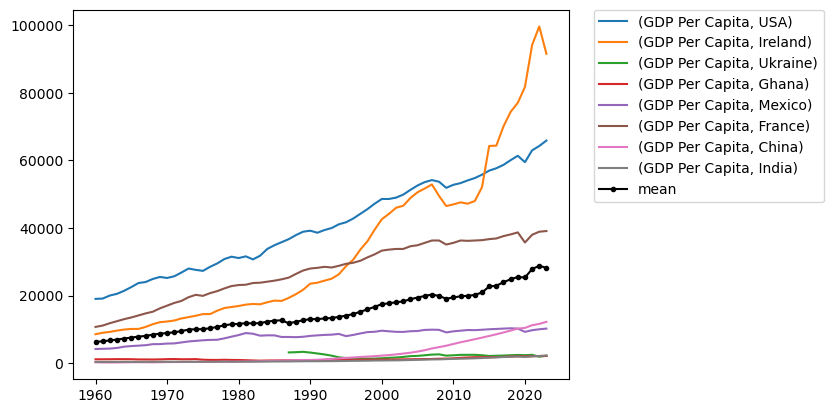

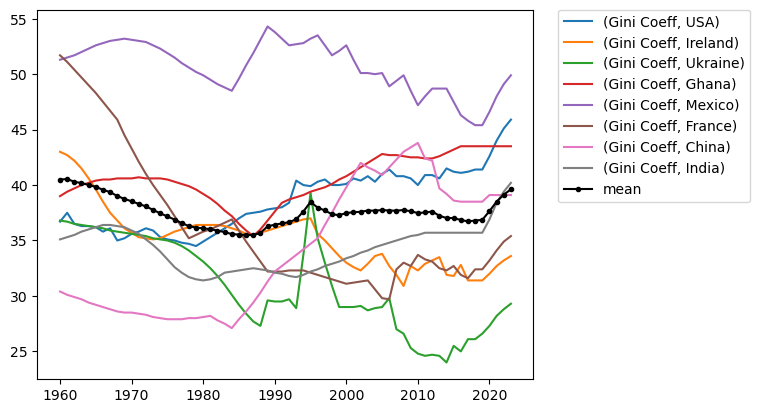

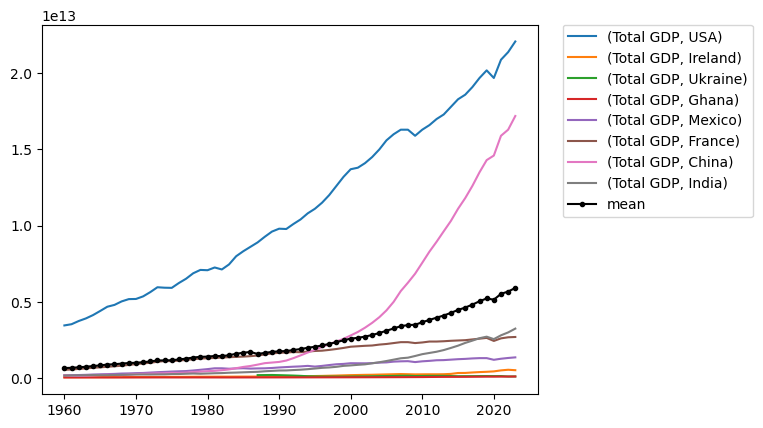

In [ ]:
# Tasks going forward:
# - User Entry
#     - Prompt user to enter some number of countries, and a start year and end year.
#     - Returns a tuple of ([list of Strings as country names], [list of start year, end year]).

# - Plotting:
#     - Plot for each metric containing:
#         - all contries and global average for time slice. 

# Advanced index slicing per countries, expecting them to come in as a list from input() 
# Advanced slicing coming in as a list for year to year 
# To split an input string 
import matplotlib.pyplot as plt 
#print(combined_data_fixed.head())
print(common_countries)
countries = ['USA','Ireland','Ukraine','Ghana','Mexico','France','China','India']
#country_list = common_countries
years = ['1960','2023'] 
def plotter(df, country_list, year_range, data_section):
    fig, ax = plt.subplots()
    idx = pd.IndexSlice
    sub_df = df.loc[idx[data_section,country_list],idx[year_range[0]:year_range[-1]]]
    sub_df = sub_df.transpose()
    sub_df.plot(ax=ax) 
    df.loc[idx[data_section,country_list],idx[year_range[0]:year_range[-1]]].aggregate(['mean']).transpose().plot(ax=ax,color='black',marker='.')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

plotter(combined_data_fixed,countries,years,'GDP Per Capita')
plotter(combined_data_fixed,countries,years,'Gini Coeff')
plotter(combined_data_fixed,countries,years,'Total GDP')




In [7]:
combined_data_fixed[combined_data_fixed.loc['GDP Per Capita']>100000]['2023'].dropna()

Metric          Country   
Total GDP       Luxembourg    7.090000e+10
                Monaco        8.750000e+09
GDP Per Capita  Luxembourg    1.060000e+05
                Monaco        2.250000e+05
Gini Coeff      Luxembourg    3.540000e+01
                Monaco        3.480000e+01
Name: 2023, dtype: float64

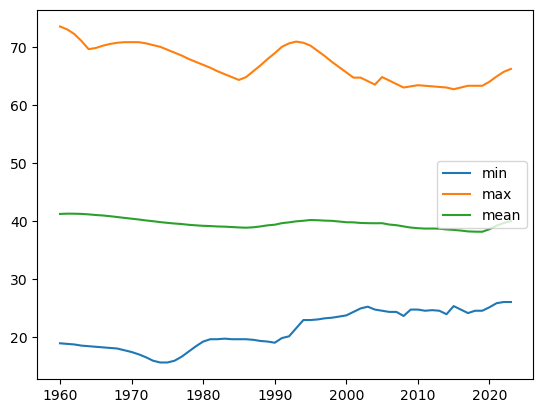

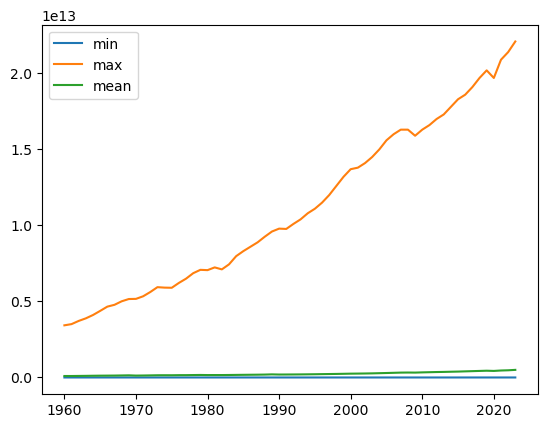

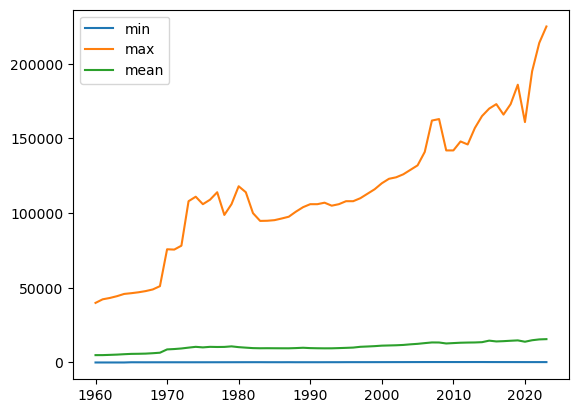

In [8]:
combined_data_fixed.loc['Gini Coeff'].aggregate(['min','max','mean']).transpose().plot()
combined_data_fixed.loc['Total GDP'].aggregate(['min','max','mean']).transpose().plot()
combined_data_fixed.loc['GDP Per Capita'].aggregate(['min','max','mean']).transpose().plot()
plt.show()

In [9]:
combined_data_copy = combined_data.copy() 
combined_data_copy.sort_index
years_list = combined_data_copy.columns.tolist()
valid_country_list = combined_data.index.get_level_values('Country').unique().tolist()

for country in valid_country_list:
    country_slice = combined_data.xs(country, level='Country')
    country_gdp_nan_sum = pd.isna(country_slice.loc['Total GDP'].values).sum()
    country_gdp_percap_nan_sum = pd.isna(country_slice.loc['GDP Per Capita'].values).sum()
    if (country_gdp_nan_sum > len(years_list)/2) | (country_gdp_percap_nan_sum > len(years_list)/2):
        combined_data_copy = combined_data_copy.drop(country, level='Country')
        print("Dropping", country, " - ", country_gdp_nan_sum, "missing values in Total GDP.")
        print(country_gdp_percap_nan_sum, "missing values in GDP Per Capita.")


valid_country_list = combined_data_copy.index.get_level_values('Country').unique().tolist()
combined_data_copy.index.names[0] == 'Metric'

# calculate gini dollars ( defined as GDP Per Capita * (1 - gini) )
#combined_data_copy
new_df = combined_data_copy.loc['GDP Per Capita'] * (1 - combined_data_copy.loc['Gini Coeff']/100)
new_df.round()
new_df.index = pd.MultiIndex.from_product([['Gini Dollars'], new_df.index], names=['Metric', 'Country'])

print(combined_data_copy.shape)
print(new_df.shape)
new_combined_data_copy = pd.concat([combined_data_copy, new_df])

economic_weightclass = pd.cut(combined_data_copy.loc['Total GDP',:]['2023'], bins=[0, 1e11, 1e12, 1e13, 1e14],labels=['Lightweight','Middleweight', 'Heavyweight', 'Superpower'])
income_class = pd.cut(combined_data_copy.loc['GDP Per Capita',:]['2023'], bins=[0, 1135, 4465, 13845, 40000, 300000],labels=['Low Income','Lower Middle Income', 'Upper Middle Income', 'High Income', 'Ultra High Income'])
equality_class = pd.cut(combined_data_copy.loc['Gini Coeff',:]['2023'], bins=[0, 30, 35, 40, 45, 50, 100],labels=['Very Low Inequality','Low Inequality', 'Low-Moderate Inequality', 'Moderate Inequality', 'Moderate-High Inequality', 'High Inequality'])
livability_class = pd.cut(new_combined_data_copy.loc['Gini Dollars',:]['2023'], bins=[0, 1135, 4465, 13845, 30000, 300000],labels=['Low Livability','Low-Moderate Livability', 'Moderate Livability', 'Moderate-High Livability', 'High Livability'])

classification = pd.concat([economic_weightclass, income_class, equality_class, livability_class])

metrics = new_combined_data_copy.index.get_level_values('Metric')
countries = new_combined_data_copy.index.get_level_values('Country')

# Use the classification series you created
new_index = pd.MultiIndex.from_arrays([
    metrics,
    classification.values,  # classification per (Metric, Country)
    countries
], names=['Metric', 'Classification', 'Country'])

# Assign to the DataFrame
new_combined_data_copy.index = new_index


combined_data_fixed.loc['Gini Coeff'].aggregate(['min','max','mean']).transpose().plot()
combined_data_fixed.loc['Total GDP'].aggregate(['min','max','mean']).transpose().plot()
combined_data_fixed.loc['GDP Per Capita'].aggregate(['min','max','mean']).transpose().plot()
plt.show()

Dropping Afghanistan  -  40 missing values in Total GDP.
40 missing values in GDP Per Capita.
Dropping American Samoa  -  43 missing values in Total GDP.
43 missing values in GDP Per Capita.
Dropping Channel Islands  -  49 missing values in Total GDP.
49 missing values in GDP Per Capita.
Dropping Cayman Islands  -  46 missing values in Total GDP.
46 missing values in GDP Per Capita.
Dropping Djibouti  -  53 missing values in Total GDP.
53 missing values in GDP Per Capita.
Dropping Eritrea  -  44 missing values in Total GDP.
44 missing values in GDP Per Capita.
Dropping Faeroe Islands  -  48 missing values in Total GDP.
48 missing values in GDP Per Capita.
Dropping Guam  -  43 missing values in Total GDP.
43 missing values in GDP Per Capita.
Dropping Kosovo  -  48 missing values in Total GDP.
48 missing values in GDP Per Capita.
Dropping Liechtenstein  -  63 missing values in Total GDP.
63 missing values in GDP Per Capita.
Dropping Montenegro  -  37 missing values in Total GDP.
37 missi

KeyError: 'Total GDP'